C:\Users\skagm\AppData\Local\Temp\ipykernel_27516\1580675299.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(col_years,rotation=90)
C:\Users\skagm\AppData\Local\Temp\ipykernel_27516\1580675299.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(col_years,rotation=90)


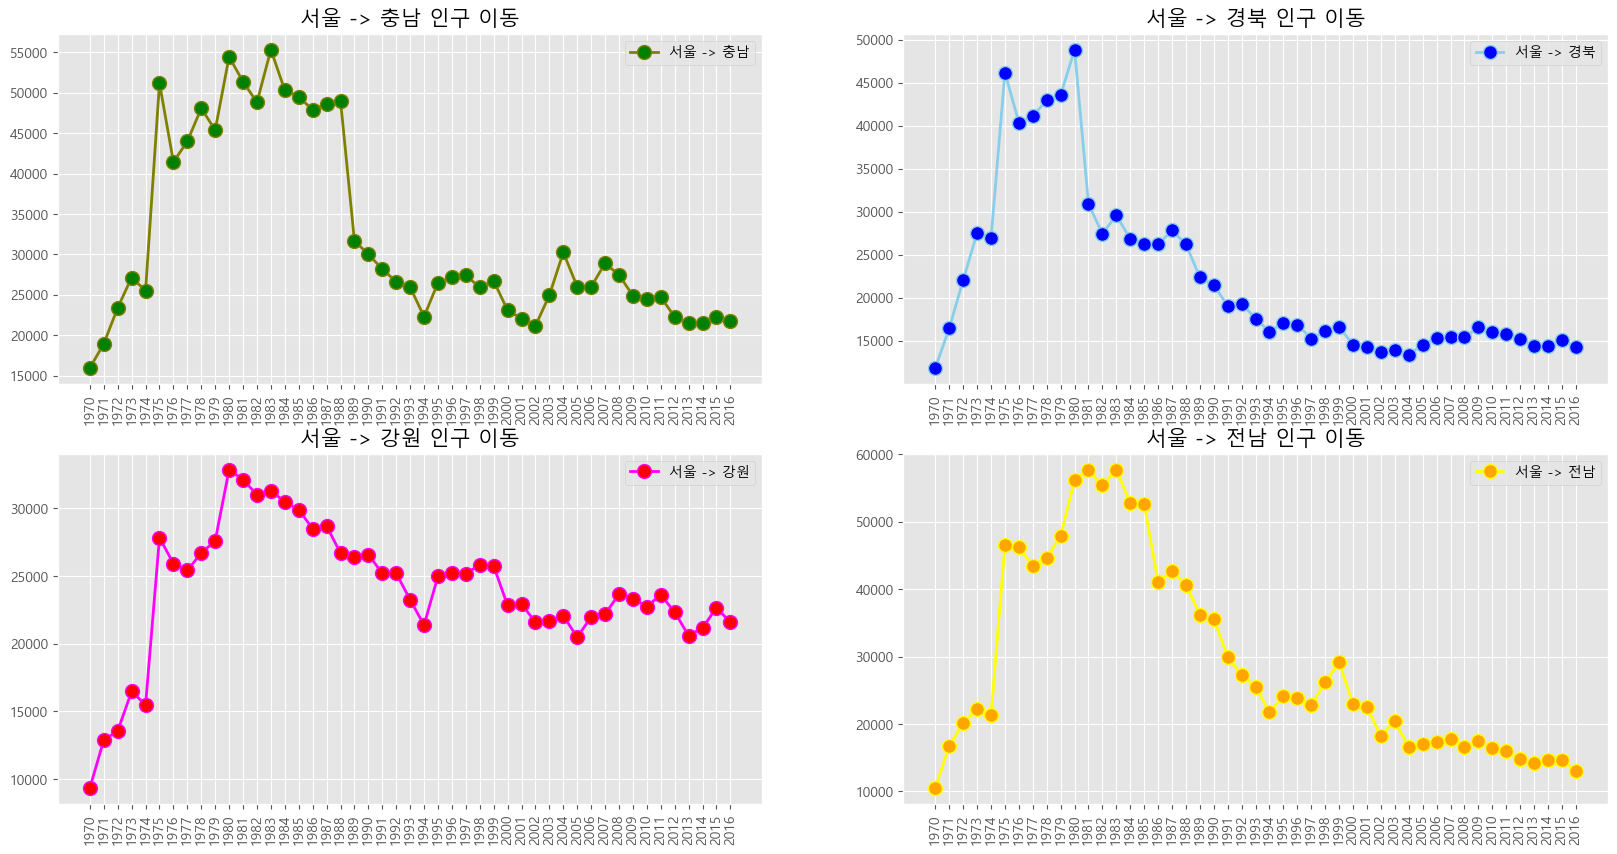

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager,rc
font_path="./data/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)
df_seoul

sr_one=df_seoul.loc['경기도']

col_years=list(map(str,range(1970,2017)))
df_3=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

plt.style.use('ggplot')

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)


ax1.plot(col_years,df_3.loc['충청남도',:],
        marker='o',markerfacecolor='green',
        markersize=10,color='olive',linewidth=2,label='서울 -> 충남')
ax2.plot(col_years,df_3.loc['경상북도',:],
        marker='o',markerfacecolor='blue',
        markersize=10,color='skyblue',linewidth=2,label='서울 -> 경북')
ax3.plot(col_years,df_3.loc['강원도',:],
        marker='o',markerfacecolor='red',
        markersize=10,color='magenta',linewidth=2,label='서울 -> 강원')
ax4.plot(col_years,df_3.loc['전라남도',:],
        marker='o',markerfacecolor='orange',
        markersize=10,color='yellow',linewidth=2,label='서울 -> 전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울 -> 충남 인구 이동',size=15)
ax2.set_title('서울 -> 경북 인구 이동',size=15)
ax3.set_title('서울 -> 강원 인구 이동',size=15)
ax4.set_title('서울 -> 전남 인구 이동',size=15)

ax1.set_xticks(range(len(col_years)))
ax2.set_xticks(range(len(col_years)))

ax1.set_xticklabels(col_years,rotation=90)
ax2.set_xticklabels(col_years,rotation=90)
ax3.set_xticklabels(col_years,rotation=90)
ax4.set_xticklabels(col_years,rotation=90)


plt.show()